1. How many movies are released each year? What is the percentage of change over time?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

movies['year'] = movies['title'].str.extract('\((\d{4})\)', expand=True)
movies['year'] = pd.to_datetime(movies['year'], format='%Y')
movies_per_year = movies.groupby(movies['year'].dt.year)['title'].count()

movies_per_year

year
1874.0       1
1878.0       1
1880.0       1
1883.0       1
1887.0       1
          ... 
2015.0    2513
2016.0    2488
2017.0    2374
2018.0    2034
2019.0     994
Name: title, Length: 135, dtype: int64

In [2]:
yearmax = movies_per_year.idxmax()
movmax = movies_per_year.max()
print(f"\n\nThe year with the most released movies is {yearmax}, with a total number of {movmax} releases.")



The year with the most released movies is 2015.0, with a total number of 2513 releases.


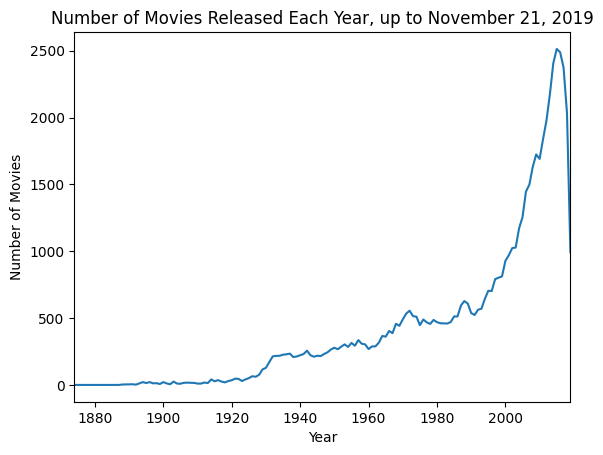

In [3]:
# plot the number of movies released per year
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title("Number of Movies Released Each Year, up to November 21, 2019")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xlim(1874, 2019)
plt.show()

In [4]:
percentage_change = movies_per_year.pct_change() * 100
percentage_change

year
1874.0          NaN
1878.0     0.000000
1880.0     0.000000
1883.0     0.000000
1887.0     0.000000
            ...    
2015.0     4.447215
2016.0    -0.994827
2017.0    -4.581994
2018.0   -14.321820
2019.0   -51.130777
Name: title, Length: 135, dtype: float64

In [5]:
toppercent_years = percentage_change.sort_values(ascending=False).head(10)
toppercent_years

year
1894.0    633.333333
1903.0    333.333333
1888.0    300.000000
1914.0    180.000000
1900.0    175.000000
1912.0     72.727273
1906.0     70.000000
1929.0     51.948052
1919.0     50.000000
1896.0     46.666667
Name: title, dtype: float64

From the graphs above, we can see the trends in the amount of released movies from 1874 to 2019.

DISCLAIMER: Keep in mind that some of the data collected from the datasets are inaccurate. For example, the very first motion picture film was released in 1888, while in the dataset there was a movie dating back to 1874.

Around the 1890s to 1910s, we can see the biggest changes in the amount of released movies. This is due to a number of factors, namely:

1. The advent of new technology:

    With the introduction of modern inventions such as the motion picture camera, projector, and many others, filmmaking became an easier and cost-effective job albeit still requiring so much more effort compared to now.

2. Increasing demand for new entertainment:

    Motion picture cinema was still fresh at the time, and people will always flock over to experience the new and exciting. Also, the mid-1910s was the start of the First World War (1914-1918). Although costs were definitely skyrocketing, this also served as a novel avenue for filmmakers to explore the themes of grief, war, and loss. The collective social mood was also predominantly gloomy at the time, so any form of stimulating entertainment should definitely suffice the desparate and immediate need for joy or conversely, emotional processing.

3. Lack of IP laws:

    IP or intellectual property was not really an immediate thought during the 1890s to 1910s. Thus, creators could make films and adapt popular themes and stories without worrying about copyright infringement and lawsuits like today.

From the line graph, we can also see that there was a huge spike around the 1990s that persisted up to the rightmost part of the figure. This was again primarily because of the intrroduction of yet another new technology. In this case, CGI and computer animation made it easier to make animation films. Moreover, they were also used to improve the visual experience for all sorts of films ranging from action to even drama. Movies like Interstellar, Rise of the Planet of the Apes, and Pearl Harbour are great examples of the range theses technologies can be used in.

The sudden drop in the year 2019 is most likely because the data in the datasets for that year was still incomplete.

2. What are the most popular genre of movies?

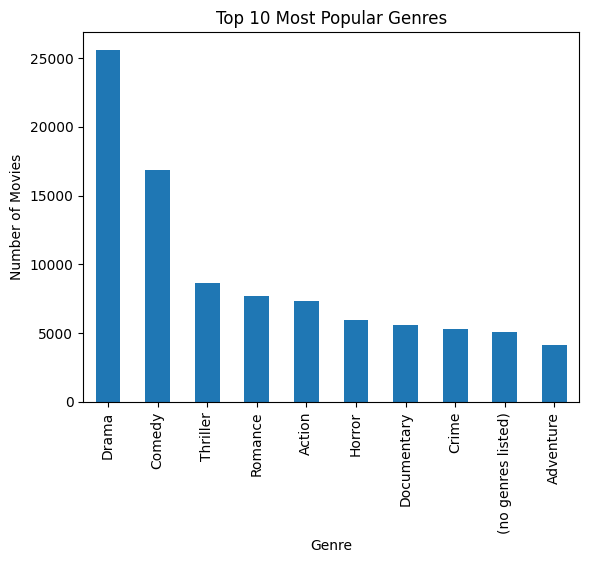

In [6]:
genres = movies['genres'].str.split('|', expand=True).stack().reset_index(drop=True)
genre_counts = genres.value_counts()

# plot the most popular genres
genre_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

From the chart above, we can see that the most popular genre among viewers is drama, followed by comedy. These two genres are usually the most entertaining, relatable, and cathartic for the average movie viewer. Many films that are considered "classics" are typically either one of the two most popular genres, for example 'The Godfather' for drama and 'Mean Girls' for comedy. These two genres are also the most receptive in allowing for social interaction or bonding between the viewers. For documentary, crime, and adventure being the lowest in the Top 10 list, this can be attributed to their lack of allowed escapism and the nicheness of their target audiences. Documentary and crime movies are usually too heavy subject matters for viewers and only appeal to certain people. On the other hand, adventure movies may feel too formulaic and repetitive. Also, they tend to be outclassed in popularity by blockbuster movies that release at the same time as them, thus lowering the incentive for creating these films given their extremely high production costs.

3. Does the taste of movies changes over time?

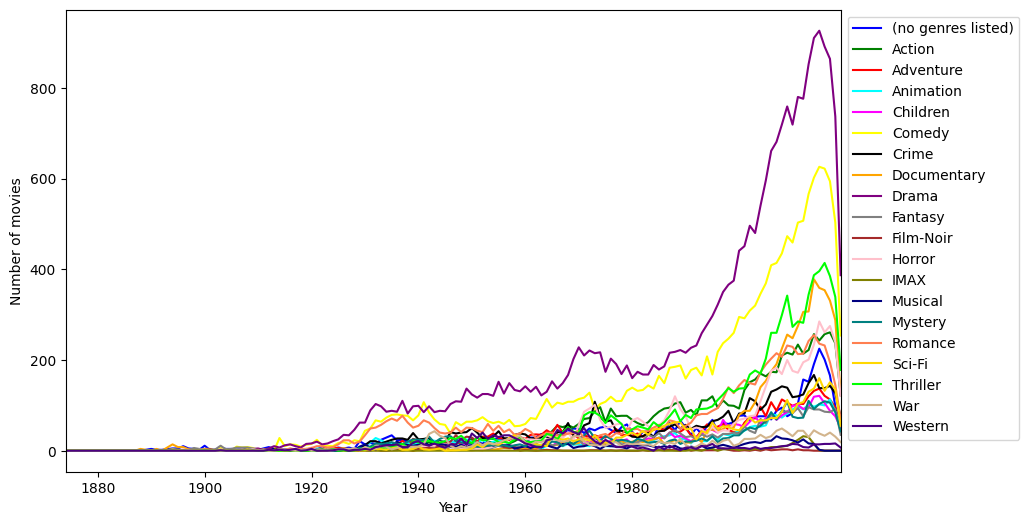

In [12]:
# Extract the years and add to movies dataframe
movies['year'] = movies['title'].str.extract('\((\d{4})\)', expand=False)
movies['year'] = pd.to_datetime(movies['year'], format='%Y').dt.year

# Split the genres and explode the rows (to address the problem caused by genre combinations)
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')

# Filter out unwanted genres
wanted_genres = ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = movies[movies['genres'].isin(wanted_genres)]

# Count the number of movies in each genre each year
genre_counts = movies.groupby(['year', 'genres']).size().reset_index(name='count')

# Pivot the table to have each genre as a column
genre_counts = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'gray', 'brown', 'pink', 'olive', 'navy', 'teal', 'coral', 'gold', 'lime', 'tan', 'indigo']
for i, genre in enumerate(genre_counts.columns):
    ax.plot(genre_counts.index, genre_counts[genre], label=genre, color=colors[i])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Year')
plt.xlim(1874,2019)
ax.set_ylabel('Number of movies')
plt.show()

We can infer from the graph above that the drama and comedy genres have persisted as the two most popular genres for more than a century. Aside from the 1940s where comedy briefly took the spot, drama is overall the single most popular among them all. We can also see that horror suddenly had a peak around the 1980s to 1990s but then suddenly dropped. This was the time when "slasher" and "torture porn" classics like 'The Nightmare on Elm Street', 'Scream', 'Friday the 13th' and many others became wildly popular and then cemented as cult favorites. The drop, however, was most likely a result of viewers getting bored of the repetitive and unoriginal nature of the genre at the time. Around the 2000s, horror gained another resurgence and actually maintained its popularity as a genre. Also, thriller suddenly became the third leading genre. Documentaries jumped in popularity as well in the late 2000s, likely due to the fast-changing political and social landscape. Filmmakers were experimenting and incorporating many themes, constantly redefining what it truly means to be scary. Today, the horror and thriller genres are practically married together. Both genres in the modern times explore many sub-themes of drama and opened the 2000s to a true creative renaissance in filmmaking. Horror, thriller, and documentaries are predicted to be the most popular genres in the future, just below drama and comedy.

4. What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [70]:

# Merge the movies and ratings data frames
movie_ratings = pd.merge(movies, ratings, on='movieId')

# Group the data by movieId and calculate the count and average of ratings
movie_ratings_agg = movie_ratings.groupby(['movieId', 'title']).agg({'userId': 'count', 'rating': 'mean'})

# Rename the columns
movie_ratings_agg.columns = ['num_ratings', 'avg_rating']

# Sort the movies by number of ratings and average rating
movie_ratings_agg = movie_ratings_agg.sort_values(['num_ratings', 'avg_rating'], ascending=[False, False])

# Reset the index and add a rank column
movie_ratings_agg = movie_ratings_agg.reset_index()
movie_ratings_agg['rank'] = movie_ratings_agg.index + 1

# Select the top 20 movies and display the table
top_movies = movie_ratings_agg.head(20)
top_movies = top_movies[['rank', 'title', 'num_ratings', 'avg_rating']]
top_movies


,rank,title,num_ratings,avg_rating
0,1,Forrest Gump (1994),325964,4.05
1,2,Pulp Fiction (1994),318688,4.19
2,3,Toy Story (1995),286545,3.89
3,4,Inception (2010),272265,4.16
4,5,Jurassic Park (1993),256576,3.68
5,6,"Lion King, The (1994)",256470,3.82
6,7,Shrek (2001),253818,3.75
7,8,Fight Club (1999),235092,4.23
8,9,"Silence of the Lambs, The (1991)",222381,4.15
9,10,"Matrix, The (1999)",218022,4.15


From the table above, we can see that all of the most rated movies are extremely popular and are widely considered as 'classics'. Most likely, almost everyone who keeps update with pop culture knows all of these films. Many of them are either popular animated films, actions, crimes, thrillers, dramas, comedies, or science fictions. For the top three, e have Forrest Gump, Pulp Fiction, and Toy Story. All of these films tackle subject matter that resonate with the typical movie viewer, albeit widely varied in creative interpretation. For instance, Forrest Gump is more of a comfort film, Pulp Fiction displays highly graphic violence, and Toy Story is a computer-animated movie. While not all of them are rated 4 and above, all of these films have received high critical acclaim from either box office success or award recognition. Also, one thing that can be noticed from the table is that most of these films were released during the 1990s, and we can infer that the decade was debatably the most successful period for filmmaking.

5. What is the most popular season for releasing movies?

In [71]:

# Extract the season from the timestamp
ratings['season'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.quarter

# Replace season numbers with season names
season_names = {1: 'Q1 (January, February, and March)', 2: 'Q2 (April, May, and June)', 3: 'Q3 (July, August, and September)', 4: 'Q4 (October, November, and December)'}
ratings['season'] = ratings['season'].replace(season_names)

# Count the number of movies released in each season
movie_seasons = movies.merge(ratings, on='movieId').groupby('season')['movieId'].nunique()

movie_seasons


season
Q1 (January, February, and March)       39851
Q2 (April, May, and June)               41285
Q3 (July, August, and September)        43875
Q4 (October, November, and December)    40961
Name: movieId, dtype: int64

The most immediate thing to notice from the table is that the mid-quarters (Q2 & Q3) of the year are the most popular seasons for releasing films. These months are usually the time for summer vacation, where most students are not burdened by any schoolwork or other important responsibilities. These are also the months where families usually go out to savor the only instances where they could actually be together for long periods of time. Coming in at third is Q4 or winter because it is the Christmas season and many holiday-themed films are released at this time. For Q1, the most plausible reason for the fewer movie rollout could be because of the so-called "post-holiday fatigue" and most people have already spent so much during Q4, and so the demand is consequently lower.